In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
import warnings
warnings.simplefilter("ignore")
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import patches

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [2]:
draft=pd.read_csv('draft_num_2016.csv')

In [3]:
draft.head(60)

,Year,Rnd,Pick,Player
0,2021,1,1,Trevor Lawrence
1,2021,1,2,Zach Wilson
2,2021,1,3,Trey Lance
3,2021,1,11,Justin Fields
4,2021,1,15,Mac Jones
5,2021,2,64,Kyle Trask
6,2021,3,66,Kellen Mond
7,2021,3,67,Davis Mills
8,2021,4,133,Ian Book
9,2021,6,218,Sam Ehlinger


In [4]:
draft.shape

(300, 4)

In [5]:
rating=pd.read_csv("Career_P_rating.csv")

In [6]:
rating.head(251)

,Player,Rate
0,Tua Tagovailoa*,199.4
1,Mac Jones*,197.6
2,Kyler Murray*,181.3
3,Justin Fields*,178.8
4,Sam Bradford*,175.6
...,...,...
246,Danny Kanell,141.1
247,Dylan Thompson*,140.9
248,Marc Bulger*,140.9
249,Khalil Tate,140.9


In [7]:
rating['Player'] = rating['Player'].str.replace(r'\*', '')


In [8]:
nr=rating.merge(draft, on='Player')

In [9]:
nr.shape


(108, 5)

In [12]:
td=pd.read_csv('td_all.csv')

In [13]:
td.head()


,Rk,Player,TD
0,1.0,Case Keenum*,155.0
1,2.0,Kellen Moore*,142.0
2,3.0,Graham Harrell*,134.0
3,4.0,Colt Brennan*,131.0
4,NaN,Rakeem Cato*,131.0


In [14]:
td['Player'] = td['Player'].str.replace(r'\*', '')

In [15]:
w_td_nr3=nr.merge(td, on='Player')

In [16]:
w_td_nr3.head(60)

,Player,Rate,Year,Rnd,Pick,Rk,TD
0,Tua Tagovailoa,199.4,2020,1,5,NaN,87.0
1,Justin Fields,178.8,2021,1,11,NaN,67.0
2,Sam Bradford,175.6,2010,1,1,59.0,88.0
3,Baker Mayfield,175.4,2018,1,1,NaN,131.0
4,Joe Burrow,172.4,2020,1,1,108.0,78.0
5,Marcus Mariota,171.8,2015,1,2,22.0,105.0
6,Tim Tebow,170.8,2010,1,25,NaN,88.0
7,Kyle Trask,168.5,2021,2,64,NaN,69.0
8,Colt Brennan,167.6,2008,6,186,4.0,131.0
9,Bryce Petty,166.0,2015,4,103,NaN,62.0


In [17]:
w_td_nr3.shape

(76, 7)

In [18]:
w_td_nr3=w_td_nr3.drop(columns=['Rk'])

In [19]:
w_td_nr3.head(77)

,Player,Rate,Year,Rnd,Pick,TD
0,Tua Tagovailoa,199.4,2020,1,5,87.0
1,Justin Fields,178.8,2021,1,11,67.0
2,Sam Bradford,175.6,2010,1,1,88.0
3,Baker Mayfield,175.4,2018,1,1,131.0
4,Joe Burrow,172.4,2020,1,1,78.0
...,...,...,...,...,...,...
71,Luke Falk,142.8,2018,6,199,119.0
72,Colin Kaepernick,142.5,2011,2,36,82.0
73,Tim Couch,141.7,1999,1,1,74.0
74,Landry Jones,141.5,2013,4,115,123.0


In [20]:
print(w_td_nr3)

              Player   Rate  Year  Rnd  Pick     TD
0     Tua Tagovailoa  199.4  2020    1     5   87.0
1      Justin Fields  178.8  2021    1    11   67.0
2       Sam Bradford  175.6  2010    1     1   88.0
3     Baker Mayfield  175.4  2018    1     1  131.0
4         Joe Burrow  172.4  2020    1     1   78.0
..               ...    ...   ...  ...   ...    ...
71         Luke Falk  142.8  2018    6   199  119.0
72  Colin Kaepernick  142.5  2011    2    36   82.0
73         Tim Couch  141.7  1999    1     1   74.0
74      Landry Jones  141.5  2013    4   115  123.0
75         John Beck  141.3  2007    2    40   79.0

[76 rows x 6 columns]


In [34]:
nw_td_nr3=w_td_nr3.drop(['Player','Rnd','Year'],axis=1)

In [35]:
nw_td_nr3.head(9)

,Rate,Pick,TD
0,199.4,5,87.0
1,178.8,11,67.0
2,175.6,1,88.0
3,175.4,1,131.0
4,172.4,1,78.0
5,171.8,2,105.0
6,170.8,25,88.0
7,168.5,64,69.0
8,167.6,186,131.0


In [36]:
model1 = lm.LinearRegression()
X = nw_td_nr3.drop(columns=['Pick'])
# our y, the pick number
y = nw_td_nr3['Pick']
# fit model based on data
model1.fit(X, y)

LinearRegression()

In [37]:
def rmse(target, pred):
    return np.sqrt(mean_squared_error(target, pred)) 

In [38]:
predictions = model1.predict(X)
actual = y
print(rmse(actual, predictions))
print(np.mean(actual), np.std(actual))

79.99201301569515
90.84210526315789 83.38071413885054


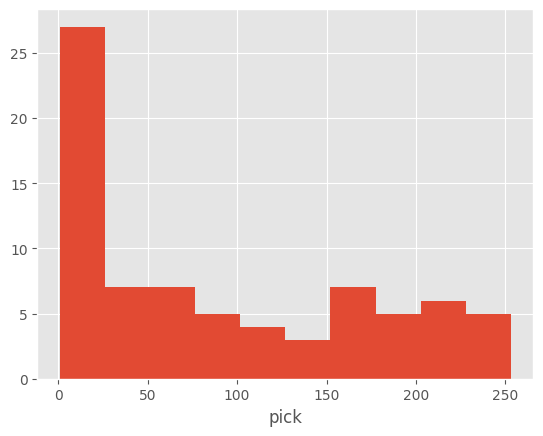

In [39]:
plt.hist(y)
plt.xlabel("pick")
plt.show()

In [40]:
non_ex_set= nw_td_nr3[nw_td_nr3['Pick']< 150]

model2=lm.LinearRegression()

x= non_ex_set.drop(columns=['Pick'])
yp= non_ex_set['Pick']
model2.fit(x,yp)
prediction=model2.predict(x)
actuals=yp
print(rmse(actuals,prediction))
print(np.mean(actuals),np.std(actuals))

41.07172587267407
42.471698113207545 42.89680630834927


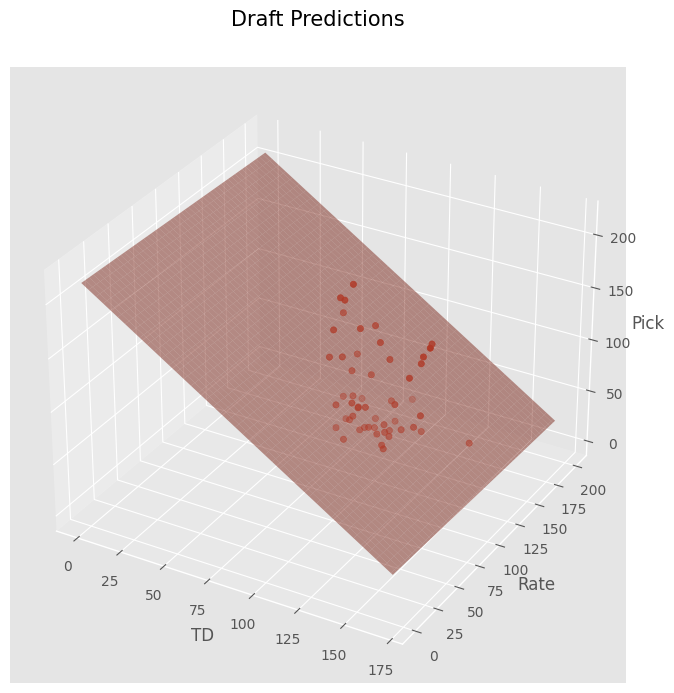

In [50]:
X,Y = np.meshgrid(np.arange(0,170,1), np.arange(0,200,1))
Z = -1.0889273613441992* X + -0.033260975581398386 * Y + 215.78500938953354

ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(non_ex_set["TD"], 
           non_ex_set["Rate"], 
           non_ex_set['Pick'])
ax.plot_surface(X, Y, Z, alpha=0.5)
plt.xlabel("TD")
plt.ylabel("Rate")
ax.set_zlabel("Pick")
plt.title("Draft Predictions", pad=30, size=15);

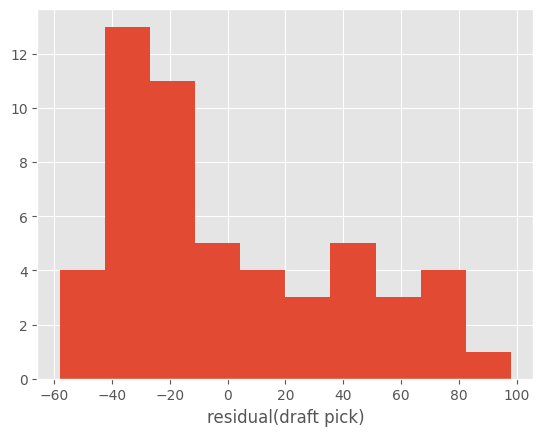

3.0030485435898574e-14


In [41]:
residual = actuals-prediction
plt.hist(residual)
plt.xlabel("residual(draft pick)")
plt.show()
print(np.mean(residual))

In [ ]:
Overall, the model has a rmse of 41 which means that the predicted pick number is still on average a full round of the draft away from the actual pick number.  

In [45]:
print([model2.intercept_, model2.coef_[0], model2.coef_[1]])

[215.78500938953354, -1.0889273613441992, -0.033260975581398386]
